UNION AND INTERSTION

In [ ]:
def g(ls1,ls2):
  union = list(set(ls1) | set(ls2))
  intersection = list(set(ls1) & set(ls2))
  return union,intersection
num1 = [5,3,6]
num2 = [8,5,2]

p = g(num1,num2)
print("union")
print(p[0])
print("intersection")
print(p[1])


union
[2, 3, 5, 6, 8]
intersection
[5]


*count of a word in a sentence*

In [ ]:
def count(str):
  count = {}
  words = str.split()
  for word in words:
    if word in count:
      count[word] += 1
    else:
      count[word] = 1
  return count
a = count("hello alex how are you hello")
print(a)


{'hello': 2, 'alex': 1, 'how': 1, 'are': 1, 'you': 1}


MATRIX MULTIPLICATION

In [ ]:
import numpy as np

b = np.array([[1, 2, 3], [5, 4, 9], [4, 8, 9]])
c = np.array([[1, 2, 3], [5, 4, 9], [4, 8, 9]])
d = np.dot(b, c)
print(d)


[[ 23  34  48]
 [ 61  98 132]
 [ 80 112 165]]


FREQUENT WORD

In [ ]:
file = open("/content/wiki page.txt", "r")
frequent_word = ""
frequency = 0
word_count = {}

for line in file:
    line_words = line.lower().replace(',', '').replace('.', '').split()
    for word in line_words:
        word_count[word] = word_count.get(word, 0) + 1


for word, count in word_count.items():
    if count > frequency:
        frequency = count
        frequent_word = word

file.close()

print(f"The most frequent word is '{frequent_word}' which appears {frequency} times.")


The most frequent word is 'and' which appears 31 times.


SINGLE REGRESSION

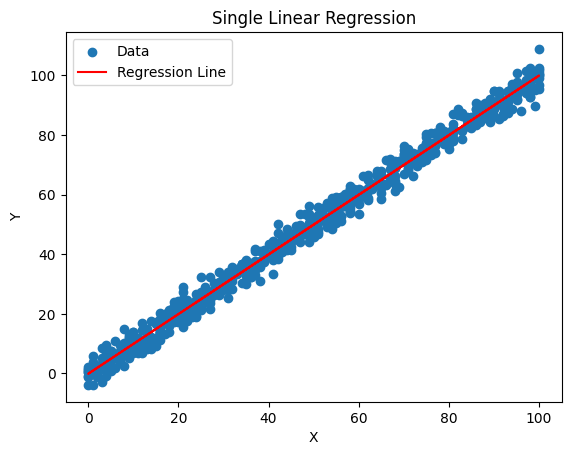

Mean Squared Error: 7.867752733487687
R-squared (Accuracy): 0.9907015319025518


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

data = pd.read_csv('training_data.csv')
data_cleaned = data.dropna(subset=['y'])
X = data_cleaned['x'].values.reshape(-1, 1)
Y = data_cleaned['y'].values
Y_filled = np.nan_to_num(Y, nan=np.nanmean(Y))
Y = Y_filled

model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

mse = mean_squared_error(Y, Y_pred)
r2 = r2_score(Y, Y_pred)

plt.scatter(X, Y, label='Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Single Linear Regression')
plt.legend()
plt.show()

print(f"Mean Squared Error: {mse}")
print(f"R-squared (Accuracy): {r2}")


MULTIPLE REGRESSION



COEFFICIENTS: [3.00637874 1.53974138 0.4616888 ]
INTERCEPT: 1.9867337988110223
MSE: 0.01293303916487631
R2: 0.9861299252460106


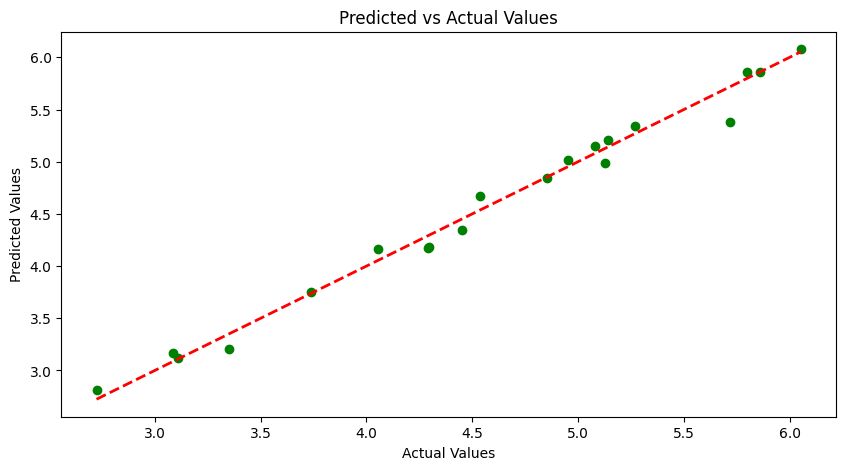

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

np.random.seed(0)
X = np.random.rand(99, 3)
Y = 2 + 3*X[:, 0] + 1.5*X[:, 1] + 0.5*X[:, 2] + np.random.randn(99) * 0.1

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print("COEFFICIENTS:", model.coef_)
print("INTERCEPT:", model.intercept_)
print("MSE:", mse)
print("R2:", r2)

plt.figure(figsize=(10, 5))
plt.scatter(Y_test, y_pred, color='green')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.show()


POLYNOMIAL REGRESSION



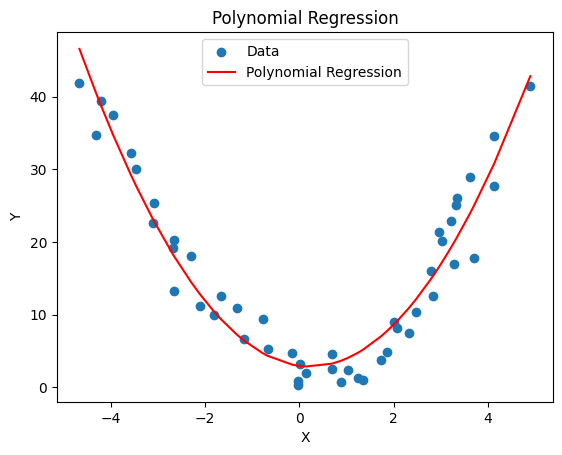

Mean Squared Error: 10.003220597194204
R-squared (Accuracy): 0.9321137090299405


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

data = pd.read_csv('/content/Ice_cream selling data.csv')
X = data['X'].values.reshape(-1, 1)
Y = data['Y'].values

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)

Y_pred = model.predict(X_poly)
X_sort, Y_sort = zip(*sorted(zip(X.flatten(), Y_pred)))

mse = mean_squared_error(Y, Y_pred)
r2 = r2_score(Y, Y_pred)

plt.scatter(X, Y, label='Data')
plt.plot(X_sort, Y_sort, color='red', label='Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

print(f"Mean Squared Error: {mse}")
print(f"R-squared (Accuracy): {r2}")

NAIVE BAYES

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = GaussianNB()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9777777777777777
Precision: 0.9761904761904763
Recall: 0.9743589743589745

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


DESTION TREE

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sys

data = pd.read_csv("PlayTennis.csv")
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

le = LabelEncoder()
X_encoded = X.apply(le.fit_transform)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

def classify_sample(sample):
    encoded_sample = [le.fit_transform(X[col])[le.transform([sample[col]])[0]] for col in X.columns]
    prediction = clf.predict([encoded_sample])[0]
    return prediction

print("\nFeature importances:")
for feature, importance in zip(X.columns, clf.feature_importances_):
    print(f"{feature}: {importance:.4f}")

while True:
    print("\nEnter a new sample to classify (or 'quit' to exit):")
    sample = {}
    for col in X.columns:
        value = input(f"Enter value for {col}: ")
        if value.lower() == 'quit':
            sys.exit()
        sample[col] = value
    result = classify_sample(sample)
    print(f"Classification: {result}")

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True, rounded=True)
plt.savefig('playtennis_decision_tree.png')
print("Decision tree visualization saved as 'playtennis_decision_tree.png'")

Model Accuracy: 1.00

Feature importances:
Outlook: 0.6155
Temperature: 0.0000
Humidity: 0.1451
Wind: 0.2394

Enter a new sample to classify (or 'quit' to exit):
Enter value for Outlook: Sunny
Enter value for Temperature: Hot
Enter value for Humidity: High
Enter value for Wind: Weak


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Classification: Yes

Enter a new sample to classify (or 'quit' to exit):
Enter value for Outlook: quit


SystemExit: 

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Decision tree visualization saved as 'playtennis_decision_tree.png'


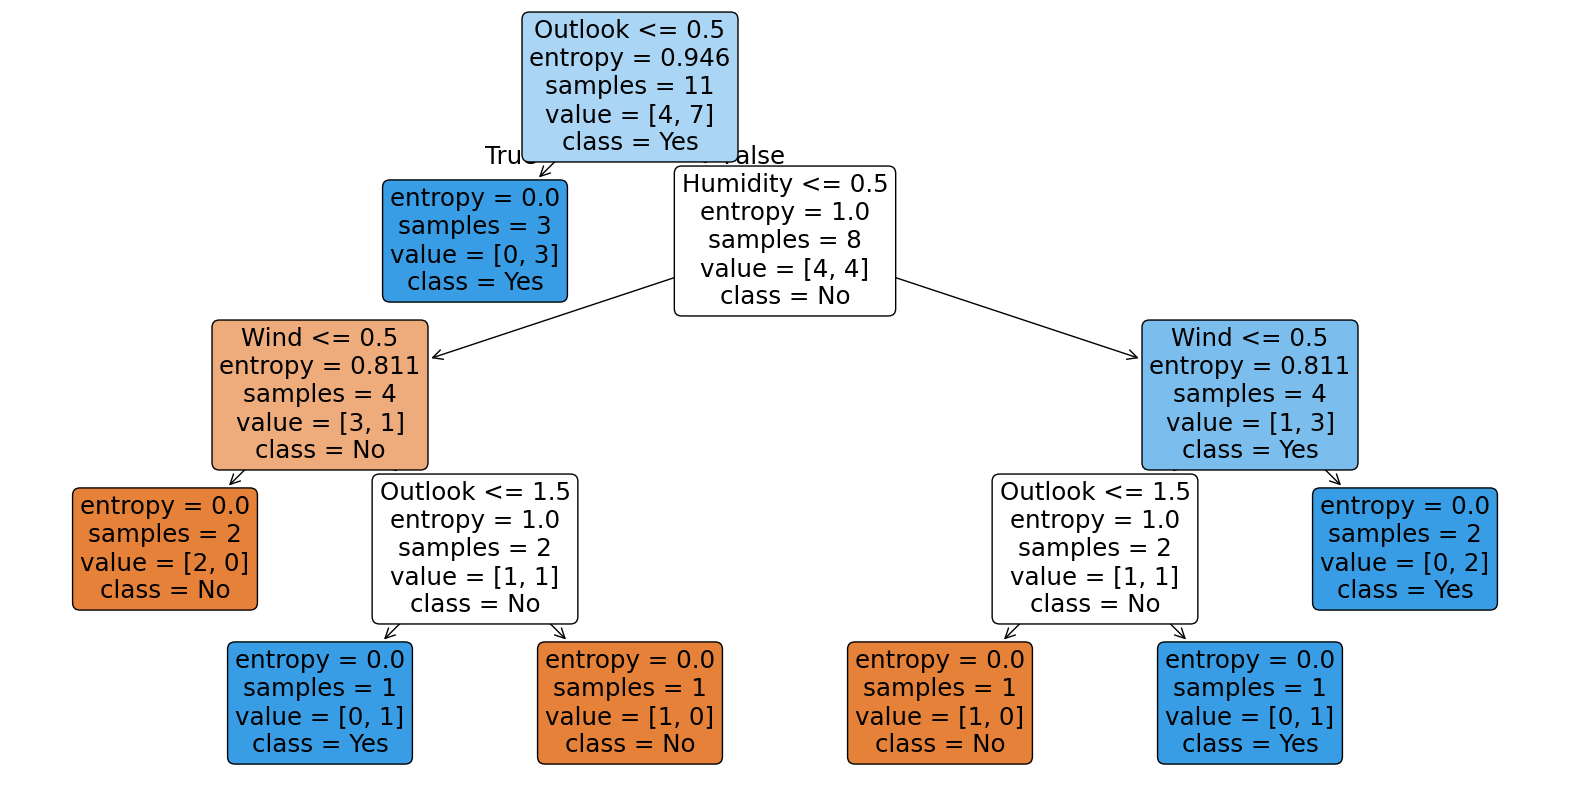

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True, rounded=True)
plt.savefig('playtennis_decision_tree.png')
print("Decision tree visualization saved as 'playtennis_decision_tree.png'")

SVM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


data = pd.read_csv('data.csv')

if data['y'].isnull().any():
    data = data.dropna(subset=['y'])


X = data.drop('y', axis=1)
y = data['y']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_reg = SVR(kernel='rbf', C=1, gamma='scale')
svm_reg.fit(X_train, y_train)

y_pred = svm_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 20.04


K MEAN CLUSTERING

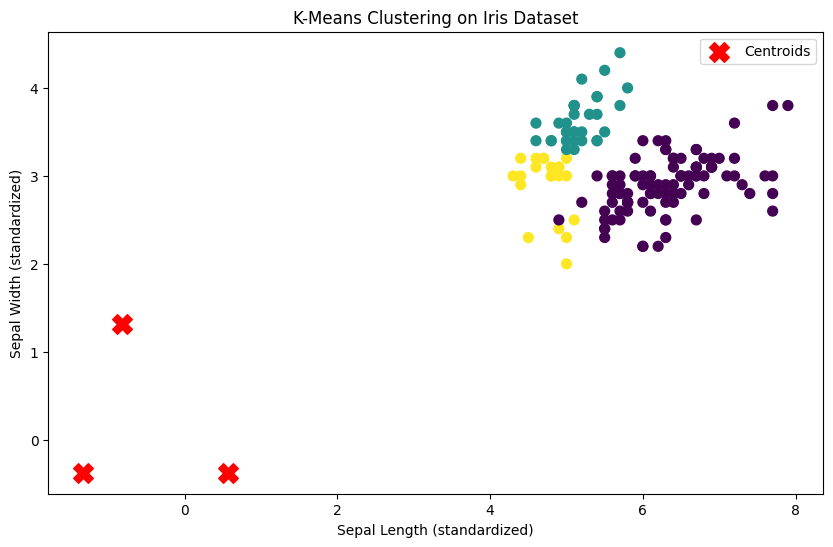

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

clusters = kmeans.predict(X_scaled)
X['Cluster'] = clusters

plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=X['Cluster'], cmap='viridis', s=50)
plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')

centroids = kmeans.cluster_centers_
centroids_2d = centroids[:, :2]
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7541 - loss: 0.5868 - val_accuracy: 0.7906 - val_loss: 0.5066
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7879 - loss: 0.4953 - val_accuracy: 0.7952 - val_loss: 0.4791
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8012 - loss: 0.4620 - val_accuracy: 0.7989 - val_loss: 0.4647
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7965 - loss: 0.4625 - val_accuracy: 0.8020 - val_loss: 0.4555
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8233 - loss: 0.4227 - val_accuracy: 0.8027 - val_loss: 0.4474
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8128 - loss: 0.4200 - val_accuracy: 0.8050 - val_loss: 0.4416
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8103 - loss: 0.4325 - val_accuracy: 0.8088 - val_loss: 0.4372
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8106 - loss: 0.4264 - val_accu

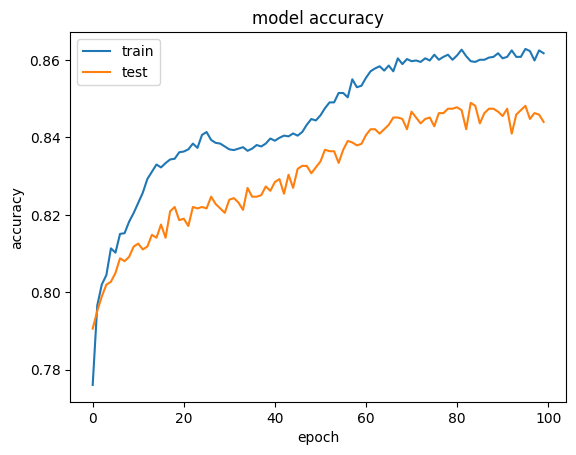

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras. layers import Dropout
dataset= pd.read_csv("Churn_Modelling.csv")
dataset.head()
X= dataset.iloc[:,3:-1]
y=dataset.iloc[:,-1]
X.head()
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender= pd.get_dummies(X['Gender'],drop_first=True)
X=pd.concat([X,geography,gender],axis=1)


X.drop(['Geography','Gender'],axis=1,inplace=True)
X.head()
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)


X_test=sc.transform(X_test)
classifier= Sequential()
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))


classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))


classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
classifier.summary()
classifier.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)
y_pred= classifier.predict(X_test)
y_pred= (y_pred>0.5)
y_pred
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


cm= confusion_matrix(y_test,y_pred)
print(cm)
accuracy=accuracy_score(y_test,y_pred)
print('The accuracy of the model is',accuracy)
cl_report = classification_report(y_test,y_pred)
print(cl_report)
print(model_history.history.keys())


plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('Ice_cream selling data.csv')

In [ ]:
data.head()

,X,Y
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [ ]:
x = data.iloc[:,0].values
y = data.iloc[:,1].values

In [ ]:
print(x)

[-4.66226268 -4.31655945 -4.21398477 -3.94966109 -3.57855372 -3.4557117
 -3.10844012 -3.08130332 -2.67246083 -2.65228679 -2.65149803 -2.288264
 -2.11186969 -1.81893761 -1.66034773 -1.32637898 -1.17312327 -0.77333004
 -0.6737528  -0.14963487 -0.0361565  -0.03389529  0.0086077   0.14924457
  0.68878091  0.69359887  0.87490503  1.02418081  1.24071162  1.35981267
  1.74000001  1.85055193  1.99931037  2.0751006   2.31859124  2.471946
  2.78483646  2.83176021  2.95993209  3.02087431  3.21136614  3.27004407
  3.31607252  3.33593241  3.61077848  3.70405744  4.13086796  4.13353379
  4.89903151]


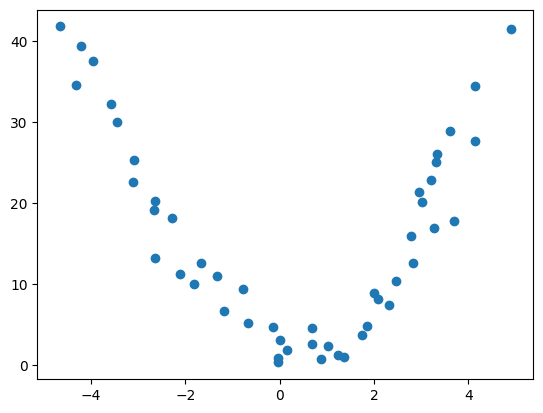

In [ ]:
plt.scatter(x,y)
plt.show()

In [ ]:
X_poly = PolynomialFeatures(degree=2)

In [ ]:
X_poly = X_poly.fit_transform(x.reshape(-1,1))

In [ ]:
REG1 = LinearRegression()
REG1.fit(X_poly,y)

LinearRegression()